# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data and display

In [2]:
df = pd.read_csv('dataframe_.csv')
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [3]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
df.shape

(1697, 2)

In [6]:
df.isna().sum()

input     1
output    1
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.shape

(1696, 2)

In [9]:
df.corr()

,input,output
input,1.000000,0.511776
output,0.511776,1.000000


In [10]:
df = df[~df.duplicated()]

In [11]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1105,-112.018496,121.096397
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885


# Visualize the data and its distributions

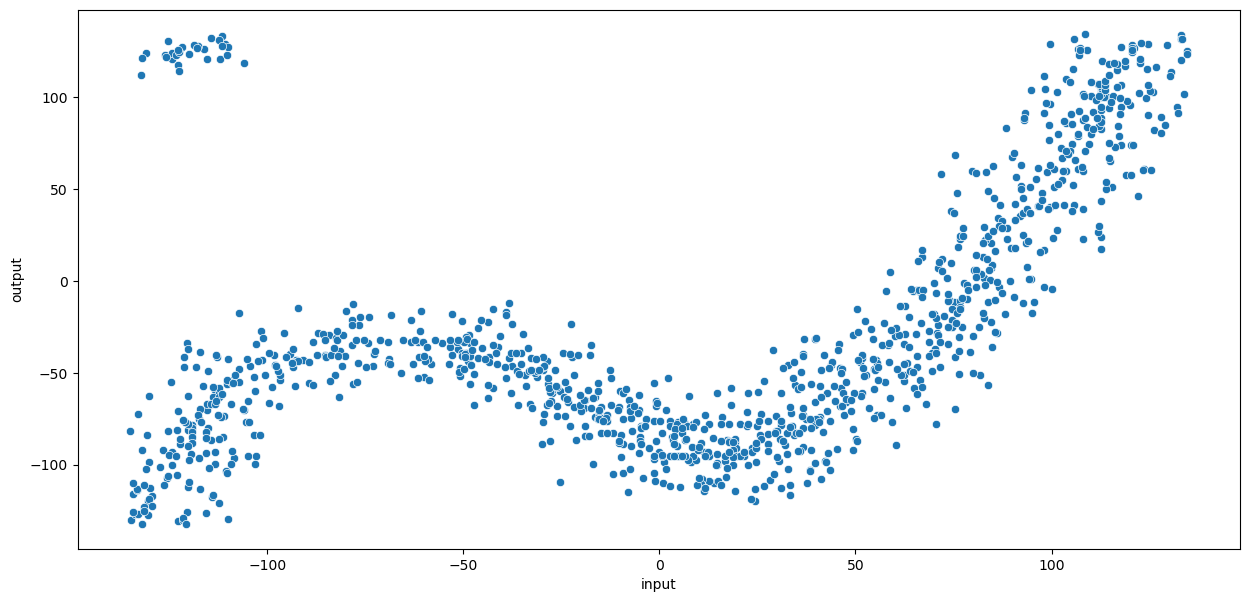

In [12]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x=df['input'], y=df['output'])
plt.show()

***
Data Analysis: 
    - It is a simple model, with one input and one output 
    - Data distribution has outliers 
    - Data is not linear
***    

In [13]:
# Visualize the distribtion

/Users/shivakmuddam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


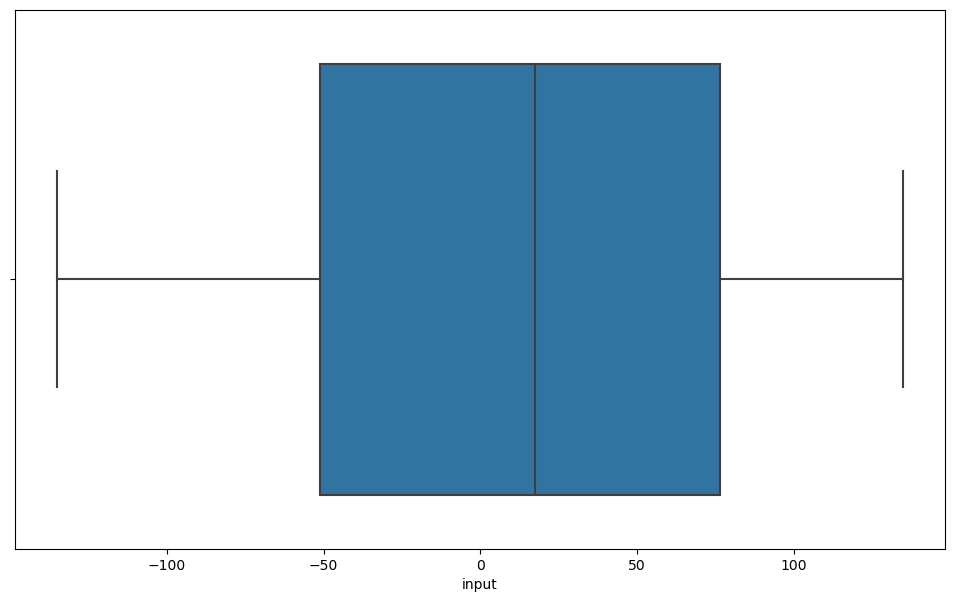

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(df['input'])
plt.show()

/Users/shivakmuddam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


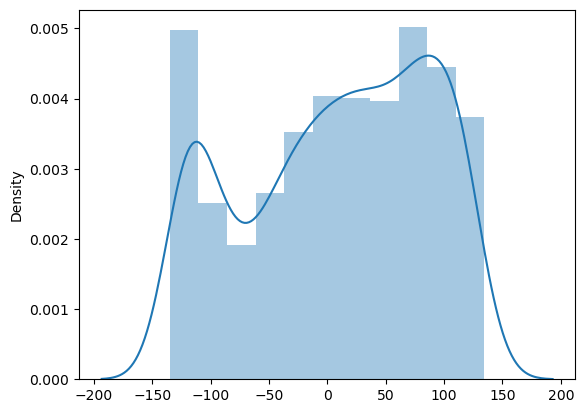

In [15]:
sns.distplot(x=df['input'])
plt.show()

# Model Training - Linear Regression

In [16]:
# Fit the data
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(df[['input']], df[['output']])


LinearRegression()

In [17]:
print("Coeff: ", l_reg.coef_[0][0])
print("Intercept:", l_reg.intercept_[0])

Coeff:  0.43788248117463524
Intercept: -30.93756363272977


In [18]:
# Predict the data
lr_pred = l_reg.predict(df[['input']])
lr_pred

array([[-84.68355161],
       [-84.1540431 ],
       [-90.01536267],
       ...,
       [-79.07930716],
       [-79.76818984],
       [-79.25536508]])

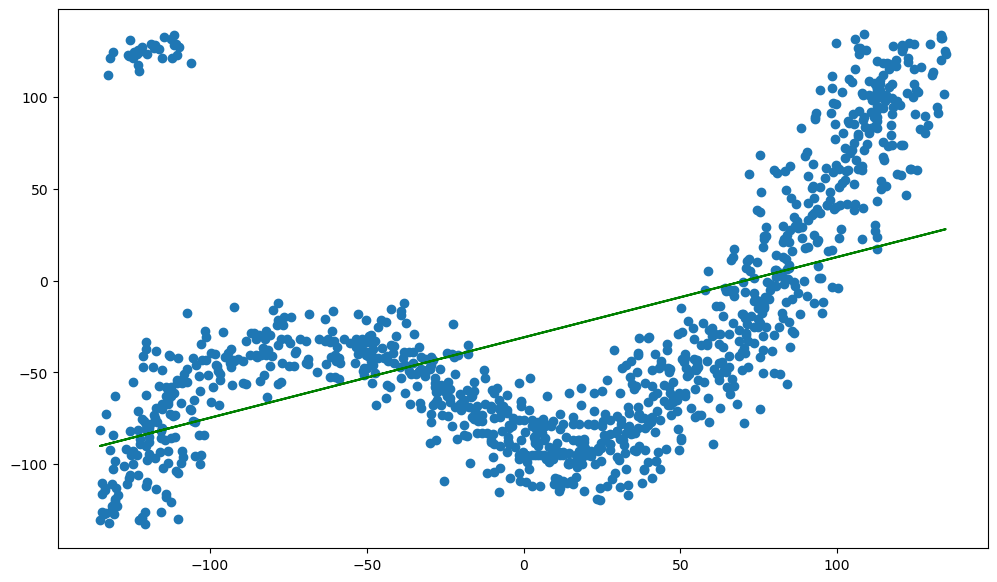

In [19]:
# Visualize the scatter plot of the distribution with the fitted regression line
plt.figure(figsize=(12, 7))
plt.scatter(df[['input']], df[['output']])
plt.plot(df['input'], lr_pred, 'g')
plt.show()

# Outlier detection and removal

In [20]:
df[(df['output'] > 100.0) & (df['input'] < -100.0)]

,input,output
1072,-125.366669,131.000000
1073,-114.508654,132.424802
1076,-126.029114,123.060597
1077,-106.093619,118.532422
1079,-116.197531,126.190248
1081,-111.529664,133.579278
1083,-132.359238,112.246716
1085,-110.784447,128.940195
1086,-112.467825,131.374738
1088,-117.609424,128.249695


In [21]:
l =df[(df['output'] > 100.0) & (df['input'] < -100.0)].index.tolist()
l

[1072,
 1073,
 1076,
 1077,
 1079,
 1081,
 1083,
 1085,
 1086,
 1088,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1107,
 1108,
 1109,
 1110]

In [22]:
df.shape

(1090, 2)

In [23]:
df.drop(l, axis=0, inplace=True)

In [24]:
df.shape

(1061, 2)

In [25]:
# Observations:
#  - Data is not fitting with the simple linear reg model, the datapoints seems to be having polynomial in nature
#  - Perform the polynomial degree 3, because the curve seems to be having 2 curves

# Feature Engineer

In [26]:
# Implement Feature Engineering Techniques

from sklearn.preprocessing import PolynomialFeatures
poly_df = PolynomialFeatures(degree=5)
X_df_poly = poly_df.fit_transform(df[['input']])
X_df_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04,
        -1.84912147e+06,  2.26962403e+08, -2.78575169e+10],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04,
        -1.79500520e+06,  2.18149530e+08, -2.65120220e+10],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04,
        -2.45584080e+06,  3.31334720e+08, -4.47026927e+10],
       ...,
       [ 1.00000000e+00,  1.15862302e+02,  1.34240731e+04,
         1.55534401e+06,  1.80205738e+08,  2.08790517e+10],
       [ 1.00000000e+00,  1.17366199e+02,  1.37748247e+04,
         1.61669883e+06,  1.89745797e+08,  2.22697430e+10],
       [ 1.00000000e+00,  9.96831410e+01,  9.93672860e+03,
         9.90524318e+05,  9.87385753e+07,  9.84257132e+09]])

In [27]:
X_df_poly.shape

(1061, 6)

In [28]:
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
poly_df_tranform = pd.DataFrame(X_df_poly, columns=features)
poly_df_tranform['output'] = df['output']
poly_df_tranform

,f1,f2,f3,f4,f5,f6,output
0,1.0,-122.740667,15065.271434,-1.849121e+06,2.269624e+08,-2.785752e+10,-130.572085
1,1.0,-121.531419,14769.885901,-1.795005e+06,2.181495e+08,-2.651202e+10,-129.938929
2,1.0,-134.917019,18202.602016,-2.455841e+06,3.313347e+08,-4.470269e+10,-130.141832
3,1.0,-120.605951,14545.795441,-1.754309e+06,2.115802e+08,-2.551783e+10,-125.760932
4,1.0,-129.894781,16872.654053,-2.191670e+06,2.846865e+08,-3.697928e+10,-112.785214
...,...,...,...,...,...,...,...
1056,1.0,122.831827,15087.657773,1.853245e+06,2.276374e+08,2.796112e+10,109.000000
1057,1.0,134.605775,18118.714717,2.438884e+06,3.282878e+08,4.418944e+10,108.480600
1058,1.0,115.862302,13424.073071,1.555344e+06,1.802057e+08,2.087905e+10,123.148918
1059,1.0,117.366199,13774.824738,1.616699e+06,1.897458e+08,2.226974e+10,105.609348


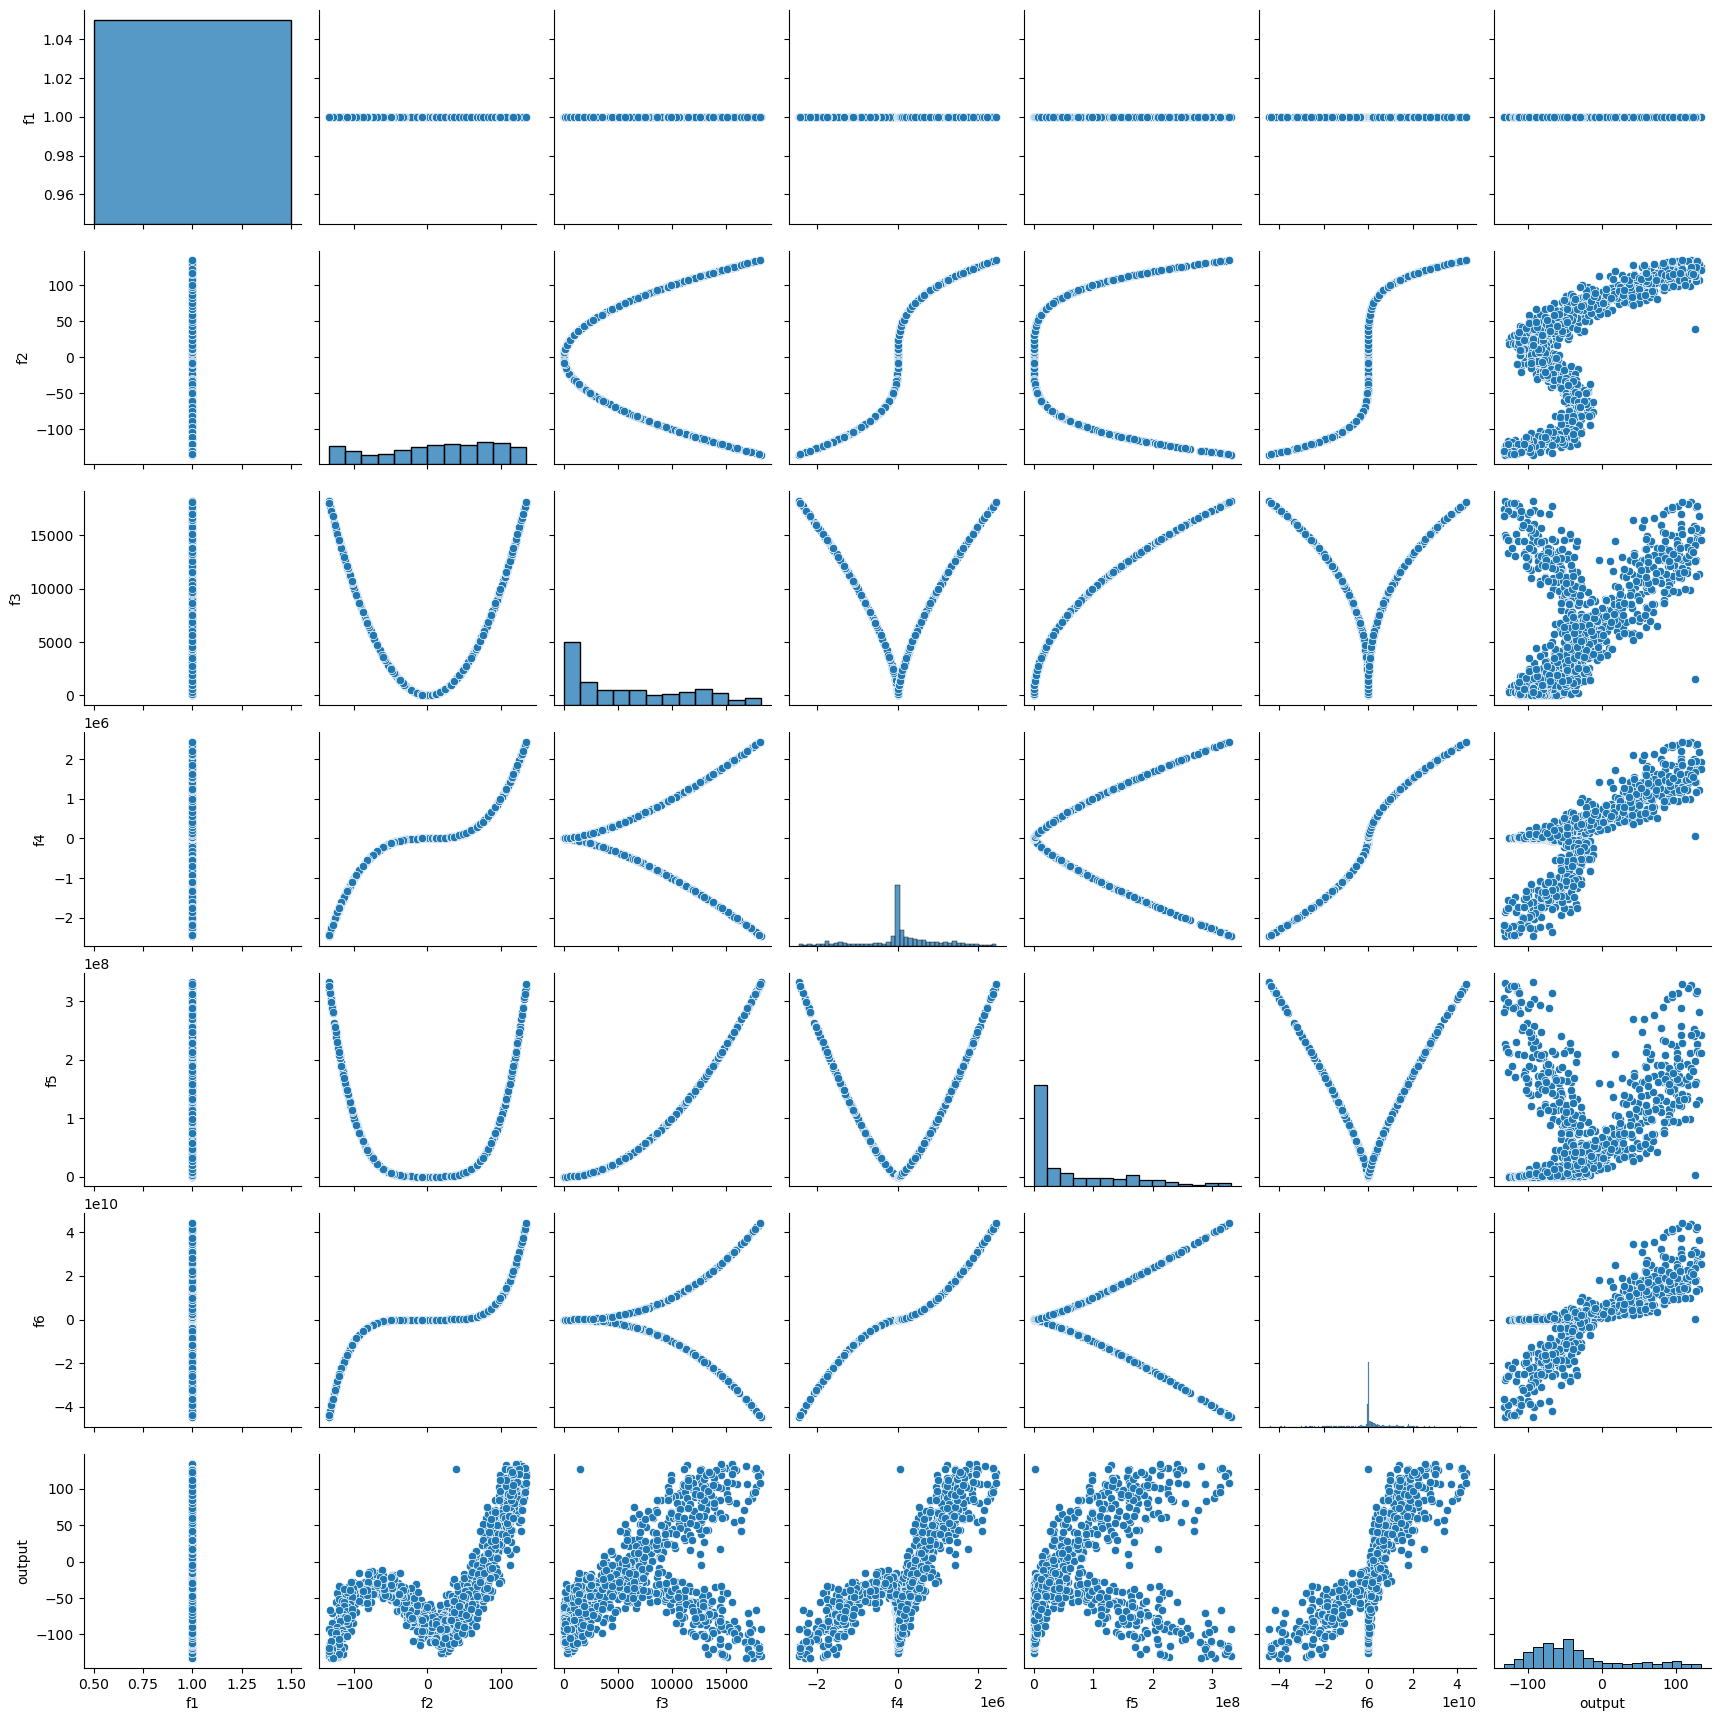

In [29]:
sns.pairplot(poly_df_tranform)
plt.show()

In [30]:
poly_df_tranform[features]
poly_df_tranform[poly_df_tranform['output'].isna()]
poly_df_tranform.dropna(inplace=True)

l_reg_poly = LinearRegression()
l_reg_poly.fit(poly_df_tranform[features], poly_df_tranform['output'])
print(l_reg_poly.coef_, l_reg_poly.intercept_)

[ 0.00000000e+00 -5.81514453e-01  1.34842273e-02  1.51700993e-04
 -5.13779816e-07 -4.11159970e-09] -82.40972999716578


In [31]:
poly_df_tranform

,f1,f2,f3,f4,f5,f6,output
0,1.0,-122.740667,15065.271434,-1.849121e+06,2.269624e+08,-2.785752e+10,-130.572085
1,1.0,-121.531419,14769.885901,-1.795005e+06,2.181495e+08,-2.651202e+10,-129.938929
2,1.0,-134.917019,18202.602016,-2.455841e+06,3.313347e+08,-4.470269e+10,-130.141832
3,1.0,-120.605951,14545.795441,-1.754309e+06,2.115802e+08,-2.551783e+10,-125.760932
4,1.0,-129.894781,16872.654053,-2.191670e+06,2.846865e+08,-3.697928e+10,-112.785214
...,...,...,...,...,...,...,...
1056,1.0,122.831827,15087.657773,1.853245e+06,2.276374e+08,2.796112e+10,109.000000
1057,1.0,134.605775,18118.714717,2.438884e+06,3.282878e+08,4.418944e+10,108.480600
1058,1.0,115.862302,13424.073071,1.555344e+06,1.802057e+08,2.087905e+10,123.148918
1059,1.0,117.366199,13774.824738,1.616699e+06,1.897458e+08,2.226974e+10,105.609348


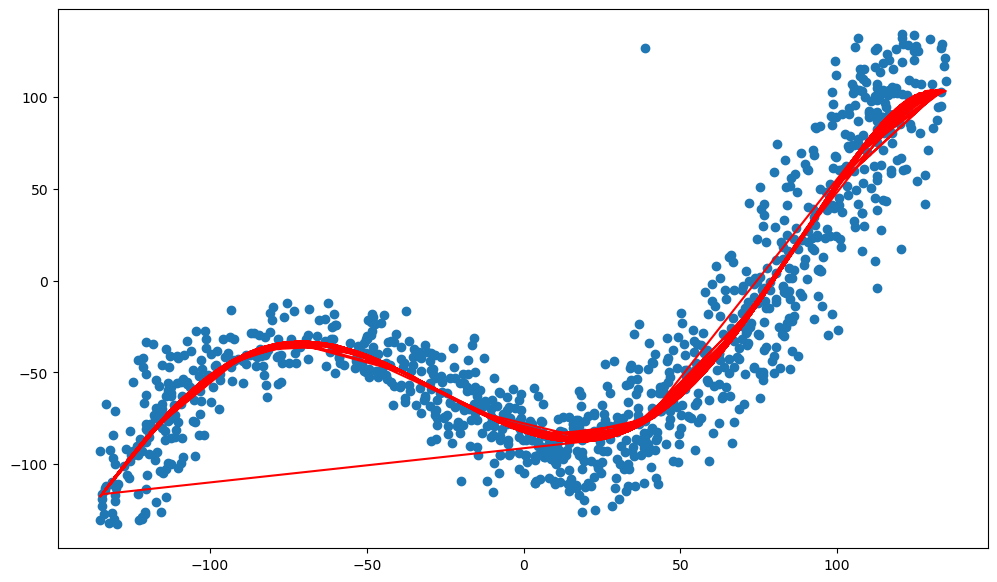

In [32]:
l_reg_pred_poly = l_reg_poly.predict(poly_df_tranform[features])
plt.figure(figsize=(12, 7))
plt.scatter(poly_df_tranform['f2'], poly_df_tranform['output'])
plt.plot(poly_df_tranform['f2'], l_reg_pred_poly, 'r')

plt.show()

# Evaluation metrics

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
print("RMSE: ", np.sqrt(mean_squared_error(l_reg_pred_poly, poly_df_tranform['output'])))
print("R2 Score: ", r2_score(l_reg_pred_poly, poly_df_tranform['output']))

RMSE:  23.276761360040528
R2 Score:  0.8424066181036909


# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

/Users/shivakmuddam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.829e+05, tolerance: 4.183e+02
  model = cd_fast.enet_coordinate_descent(


[ 0.00000000e+00 -5.78163383e-01  1.34819749e-02  1.51053364e-04
 -5.13547321e-07 -4.08351272e-09] -82.41714084490158


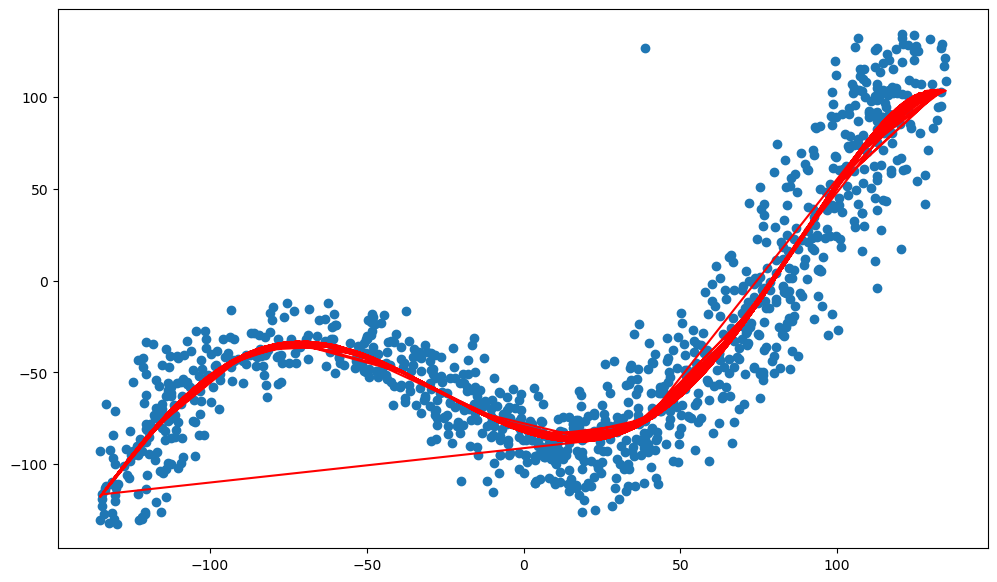

RMSE:  23.276833837763807
R2 Score:  0.8423507839487423


In [36]:
l_reg_poly = Lasso(alpha=1.0)
l_reg_poly.fit(poly_df_tranform[features], poly_df_tranform['output'])
print(l_reg_poly.coef_, l_reg_poly.intercept_)

l_reg_pred_poly = l_reg_poly.predict(poly_df_tranform[features])
plt.figure(figsize=(12, 7))
plt.scatter(poly_df_tranform['f2'], poly_df_tranform['output'])
plt.plot(poly_df_tranform['f2'], l_reg_pred_poly, 'r')
plt.show()

print("RMSE: ", np.sqrt(mean_squared_error(l_reg_pred_poly, poly_df_tranform['output'])))
print("R2 Score: ", r2_score(l_reg_pred_poly, poly_df_tranform['output']))

# Lasso Regression

/Users/shivakmuddam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.71258e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[ 0.00000000e+00 -5.81512624e-01  1.34842263e-02  1.51700638e-04
 -5.13779703e-07 -4.11158433e-09] -82.4097344472782


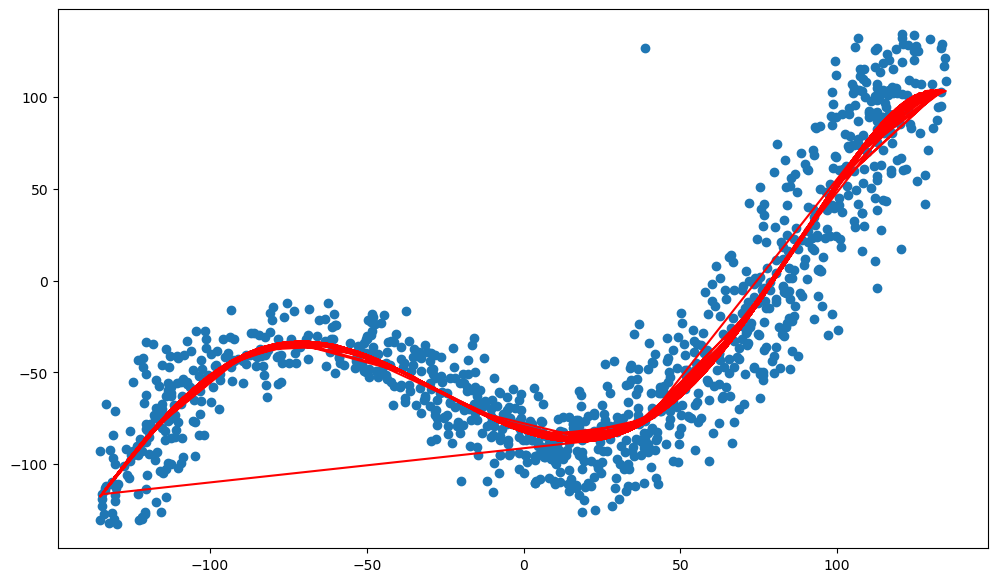

RMSE:  23.276761360062405
R2 Score:  0.842406585761818


In [37]:
l_reg_poly = Ridge(alpha=1.0)
l_reg_poly.fit(poly_df_tranform[features], poly_df_tranform['output'])
print(l_reg_poly.coef_, l_reg_poly.intercept_)

l_reg_pred_poly = l_reg_poly.predict(poly_df_tranform[features])
plt.figure(figsize=(12, 7))
plt.scatter(poly_df_tranform['f2'], poly_df_tranform['output'])
plt.plot(poly_df_tranform['f2'], l_reg_pred_poly, 'r')
plt.show()

print("RMSE: ", np.sqrt(mean_squared_error(l_reg_pred_poly, poly_df_tranform['output'])))
print("R2 Score: ", r2_score(l_reg_pred_poly, poly_df_tranform['output']))

In [ ]:
Conclusion: All the models(linear regression, Lasso and Ridge) performed almost same with RMSE 23.27
    and R2 score - 84%